In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
from scipy import stats
import random
%matplotlib inline

# Data

Up until now, we have a CSV that has a lot of information, but first and foremost, it has the manually curated start step and stop step signifiers. Let's go ahead and import this file.

In [2]:
step_seconds = pd.read_csv('./data/step_seconds.csv')

Let's do a little investigating. How does this look like? 

In [3]:
step_seconds.head()

,Mouse,Video,Start Time,End Time,Genotype,h5
0,1057,1057-2,03:54.5,03:55.5,MitoPark,D:\DLC-training\bottom_mp_paws-Ameet-2021-03-2...
1,1057,1057-2,03:55.5,03:55.9,MitoPark,D:\DLC-training\bottom_mp_paws-Ameet-2021-03-2...
2,1057,1057-2,03:56.3,03:56.9,MitoPark,D:\DLC-training\bottom_mp_paws-Ameet-2021-03-2...
3,1057,1057-2,03:56.9,03:58.7,MitoPark,D:\DLC-training\bottom_mp_paws-Ameet-2021-03-2...
4,1057,1057-2,03:58.7,03:58.8,MitoPark,D:\DLC-training\bottom_mp_paws-Ameet-2021-03-2...


Notably, we will mainly use the `Start Time` and `End Time` columns in our initial analyses. The other columns will come into play when we export our data. 

Cool! Now, let's move on to our video data. To start with, we'll be looking at mouse `1058`. This is a Wild Type mouse where we extracted roughly 50 steps. We have it's MitoPark counterpart to analyze right after this, but this should be a good test case, since there's more ambulation and tracking looks better. 

In [4]:
h5_file = step_seconds[step_seconds['Mouse'] == 1058]['h5'][18]
DLCscorer = "DLC_resnet101_bottom_mp_pawsMar24shuffle1_150000"
fps = 100
h5_file
h5_file = 'C:\\Users\\ameet\\Box Sync\\BevanLab\\MitoPark Labeled videos\\1058-bottomDLC_resnet101_bottom_mp_pawsMar24shuffle1_150000.h5'

In [5]:
Dataframe = pd.read_hdf(h5_file)

In [6]:
Dataframe[DLCscorer].head()

bodyparts        snout                        front-left-paw              \
coords               x           y likelihood              x           y   
0          1160.304321  121.739525   0.976528    1127.999512  121.199562   
1          1165.209717  119.440590   0.994910    1129.429199  119.272461   
2          1167.804443  118.316597   0.994074    1129.130005  119.135582   
3          1170.293091  119.441521   0.994837    1129.144531  119.082062   
4          1171.930420  119.485130   0.994221    1128.467041  119.849808   

bodyparts            front-right-paw                        back-left-paw  \
coords    likelihood               x           y likelihood             x   
0           0.992451     1149.799927  152.669495   0.998574   1080.829956   
1           0.987429     1151.413208  153.026657   0.988309   1081.149048   
2           0.986190     1154.743164  152.503525   0.996352   1080.376953   
3           0.989963     1155.489014  152.735092   0.997444   1080.462646   
4           0.983335     1154.174438  153.646713   0.996663   1080.125977   

bodyparts  ...            back-right-paw                           tail-base  \
coords     ... likelihood              x           y likelihood            x   
0          ...   0.998443    1160.195923  218.734772   0.976575  1099.939697   
1          ...   0.998007    1159.900269  215.889313   0.977093  1099.593628   
2          ...   0.997838    1159.762939  216.020508   0.983254  1098.627075   
3          ...   0.998132    1159.267700  215.132843   0.984205  1098.182251   
4          ...   0.998287    1159.213379  214.324371   0.977796  1097.234375   

bodyparts                            tail-tip                         
coords              y likelihood            x           y likelihood  
0          261.104309   0.999752  1136.585815  551.220154   0.064094  
1          261.481445   0.999607  1136.843872  550.501282   0.507525  
2          261.550507   0.999532  1013.421936  422.120972   0.991843  
3          260.333923   0.999627  1013.796753  421.956665   0.995607  
4          259.946442   0.999470  1012.661133  420.814545   0.994094  

[5 rows x 21 columns]

# Paw analysis
Let's start by looking at each paw

In [7]:
start_time = '00:09.550'
end_time = '00:09.730'


In [8]:
def convert_time_to_seconds (time: str) -> int:
    
    """
    Takes time in the form MM:SS:ms and converts to seconds
    """
    time = time.split(':')
    out = int(time[0]) * 60 + float(time[1])
    return out

In [9]:
start_sec = convert_time_to_seconds(start_time)
end_sec = convert_time_to_seconds(end_time)

In [10]:
start_sec

9.55

In [11]:
np.round(end_sec - start_sec, 2)

0.18

Looks like this step was about .18 seconds in duration

In [12]:
def get_snippet(data, bodypart, DLCScorer, start_sec, end_sec, fps) -> pd.DataFrame: 
    return data[DLCscorer][bodypart][int(start_sec * fps): int(end_sec * fps)]

In [13]:
back_left = get_snippet(Dataframe, 'back-left-paw', DLCscorer, start_sec, end_sec, fps)
back_right = get_snippet(Dataframe, 'back-right-paw', DLCscorer, start_sec, end_sec, fps)


front_left = get_snippet(Dataframe, 'front-left-paw', DLCscorer, start_sec, end_sec, fps)
front_right = get_snippet(Dataframe, 'front-right-paw', DLCscorer, start_sec, end_sec, fps)

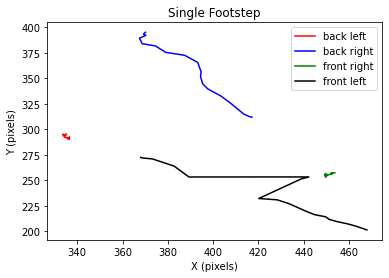

In [14]:
plt.plot(back_left['x'], back_left['y'], color = 'red', label = 'back left')
plt.plot(back_right['x'], back_right['y'], color = 'blue', label = 'back right')
plt.plot(front_right['x'], front_right['y'], color = 'green', label = 'front right')
plt.plot(front_left['x'], front_left['y'], color = 'black', label = 'front left')
plt.title('Single Footstep')
plt.legend()
#plt.savefig('trajectory.pdf')
plt.xlabel('X (pixels)')
plt.ylabel('Y (pixels)')
plt.savefig('trajectory.pdf', format='pdf', dpi=1200)

plt.show()

Ok, it's claer that our front left data is a little skewed. Let's try and figure out a way to fix this. 

In [15]:
def polynomial(x, a,b,c, d):
    return a + b*x + c*x*x + d * x * x * x


def fit_paw_to_polynomial(paw):
    timedata = np.linspace(0, paw['x'].size, paw['x'].size)
    xdata = paw['x']
    ydata = paw['y']
    popt_x, pcov = curve_fit(polynomial, timedata, xdata)
    popt_y, pcov = curve_fit(polynomial, timedata, ydata)
    return polynomial(time, popt_x[0], popt_x[1], popt_x[2]), polynomial(time, popt_y[0], popt_y[1], popt_y[2])

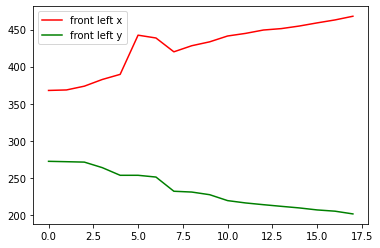

In [16]:
time = np.arange(front_left['x'].shape[0])
np.random.seed(1729)
noise = 0.2 * np.random.normal(size=front_left['x'].size)
plt.plot(time, front_left['x'] + noise, color = 'red', label = 'front left x')

plt.plot(time, front_left['y'] + noise, color = 'green', label = 'front left y')
plt.legend()


In [17]:
timedata = np.linspace(0, 18, front_left['x'].size)
xdata = np.copy(back_right['x'])
ydata = np.copy(back_right['y'])

In [18]:
popt_x, pcov_x = curve_fit(polynomial, timedata, xdata)
popt_y, pcov_y = curve_fit(polynomial, timedata, ydata)

1) Fit polynomial 

2) Get 2 * cdf(- abs(dist/stderr)) -> Two tailed test - tells you if you're on either tail of distribution of line

3) Sample according to probabilities from 2

4) Repeat steps 1-3 until params of polynomial don't change up to some epsilon

In [19]:
def flip(p):
    return True if random.random() < p else False

def sample_and_replace(p_values, data, polynomial, timedata, popt_x):
    """
    Samples with p-values and replaces with polynomial values in place. 
    """
    to_replace = np.array(list(filter(lambda p: np.random.random() < (1 - p[1]), enumerate(p_values))))
    to_replace_idx = np.array([int(i[0]) for i in to_replace])
    data[to_replace_idx] = polynomial(timedata, *popt_x)[to_replace_idx]
    
    
def get_pvals(popt, pcov, data, polynomial, timedata):
    """
    Gets p values for every data point 
    """

    perr = np.sqrt(np.diag(pcov))
    dist = data - polynomial(timedata, *popt)

    stderr = np.std(dist)
    p_values = 2 * stats.norm.cdf(-np.abs(dist/stderr), 0, 1)
    return p_values

In [38]:
def iterate_and_fit(data, polynomial):
    popt_x_old, pcov_x = curve_fit(polynomial, timedata, data)
    i = 0
    while True: 
        pvals = get_pvals(popt_x_old, pcov_x, data, polynomial, timedata)
        if np.all(pvals > .03):
            break
        sample_and_replace(pvals, data, polynomial, timedata, popt_x_old)
        #plt.plot(timedata, data, label = i)
        popt_x, pcov_x = curve_fit(polynomial, timedata, data)
        if np.allclose(popt_x_old, popt_x):
            break
        else: 
            i += 1
            popt_x_old = popt_x
    #plt.legend()
    #plt.title('Iterative Regressions')
    #plt.savefig('test.png')
    #plt.show()

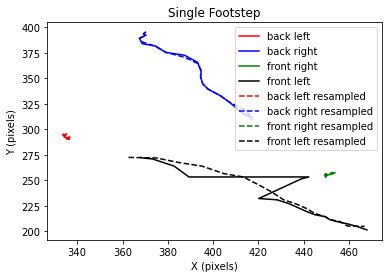

In [41]:
plt.plot(back_left['x'], back_left['y'], color = 'red', label = 'back left')
plt.plot(back_right['x'], back_right['y'], color = 'blue', label = 'back right')
plt.plot(front_right['x'], front_right['y'], color = 'green', label = 'front right')
plt.plot(front_left['x'], front_left['y'], color = 'black', label = 'front left')
plt.title('Single Footstep')

back_left_x = np.copy(back_left['x'])
back_left_y = np.copy(back_left['y'])
back_right_x = np.copy(back_right['x'])
back_right_y = np.copy(back_right['y'])
front_left_x = np.copy(front_left['x'])
front_left_y = np.copy(front_left['y'])
front_right_x = np.copy(front_right['x'])
front_right_y = np.copy(front_right['y'])

iterate_and_fit(back_left_x, polynomial)
iterate_and_fit(back_left_y, polynomial)
iterate_and_fit(back_right_x, polynomial)
iterate_and_fit(back_right_y, polynomial)
iterate_and_fit(front_left_x, polynomial)
iterate_and_fit(front_left_y, polynomial)
iterate_and_fit(front_right_x, polynomial)
iterate_and_fit(front_right_y, polynomial)

plt.plot(back_left_x, back_left_y, 'r--', label = 'back left resampled')
plt.plot(back_right_x, back_right_y, 'b--', label = 'back right resampled')
plt.plot(front_right_x, front_right_y, 'g--', label = 'front right resampled')
plt.plot(front_left_x, front_left_y, 'k--', label = 'front left resampled')
plt.legend()
plt.xlabel('X (pixels)')
plt.ylabel('Y (pixels)')
plt.savefig('single_footstep.png', format='png', dpi=1200)
plt.show()

# Metrics
Great! Now we've figured out how to detect and smooth outliers. Let's move on to metrics. 

The first metric is the time a single step takes - this is simple, we actually don't even need to look at the data for this. 

The second is the distance each paw travels during a step This is also fairly simple - euclidean distance from each point to each consecutive point. 

The third is the maximum width of a stride. 

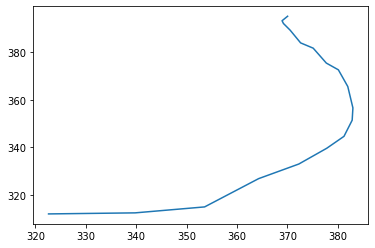

In [209]:
plt.plot(xdata, ydata)

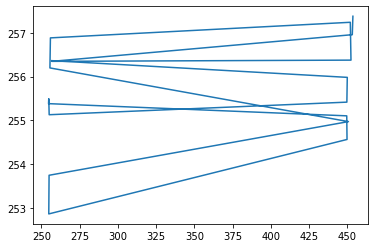

In [202]:
plt.plot(xdata, ydata)

array([ 3.62440743e+02,  1.21835577e+01, -5.80062908e-01,  1.24698732e-02])

C:\Users\ameet\Anaconda3\envs\notebooks\lib\site-packages\scipy\optimize\minpack.py:755: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma


[ 4.18296427e+00 -9.33287862e-01  2.18579281e-02 -2.70555700e-06
  0.00000000e+00  1.69516898e-02  4.59380091e-02  8.20446029e-02
  1.20357116e-01  1.55961194e-01  0.00000000e+00 -8.19783387e-02
  3.95464725e-01 -2.78605254e-01 -2.81333581e-01  1.37166017e-01
  0.00000000e+00  2.03500674e-01]
[ 4.18296427e+00 -9.33287862e-01  2.18579281e-02 -2.70555700e-06
  0.00000000e+00  1.69516898e-02  4.59380091e-02  8.20446029e-02
  1.20357116e-01  1.55961194e-01  0.00000000e+00 -8.19783387e-02
  3.95464725e-01 -2.78605254e-01 -2.81333581e-01  1.37166017e-01
  0.00000000e+00  2.03500674e-01]
[ 4.18296427e+00 -9.33287862e-01  2.18579281e-02 -2.70555700e-06
  0.00000000e+00  1.69516898e-02  4.59380091e-02  8.20446029e-02
  1.20357116e-01  1.55961194e-01  0.00000000e+00 -8.19783387e-02
  3.95464725e-01 -2.78605254e-01 -2.81333581e-01  1.37166017e-01
  0.00000000e+00  2.03500674e-01]
[ 4.18296427e+00 -9.33287862e-01  2.18579281e-02 -2.70555700e-06
  0.00000000e+00  1.69516898e-02  4.59380091e-02  8.2

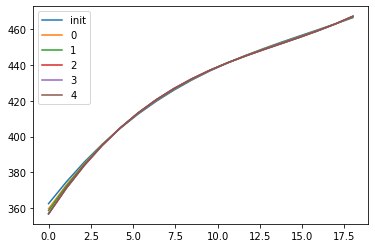

In [155]:
popt_x, pcov_x = curve_fit(polynomial, timedata, xdata)
plt.plot(timedata, polynomial(timedata, *popt_x), label = 'init')
for i in range(10):
    perr = np.sqrt(np.diag(pcov_x))
    dist = xdata - polynomial(timedata, *popt_x)
    
    stderr = dist/np.std(dist)
    try:
        popt_x, pcov_x = curve_fit(polynomial, timedata, xdata, sigma = stderr)
        plt.plot(timedata, polynomial(timedata, *popt_x), label = i)
    except Exception as e:
        print(stderr)
        
plt.legend()
plt.show()

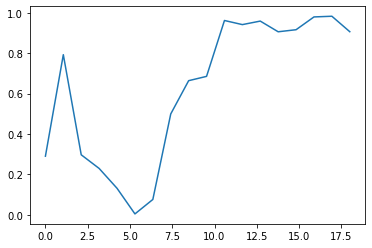

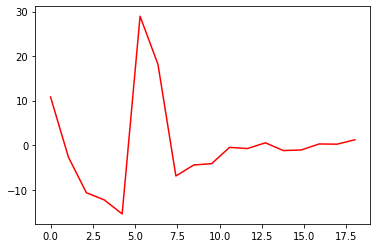

array([0, 2, 3, 4, 5, 6, 7])

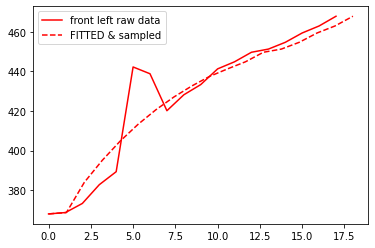

In [152]:
plt.plot(time, front_left['x'], color = 'red', label = 'front left raw data')
plt.plot(timedata, xdata, 'r--', label = 'FITTED & sampled')
plt.legend()
plt.savefig('test.png')

In [65]:
popt_x, pcov_x = curve_fit(polynomial, timedata, xdata, sigma = stderr)


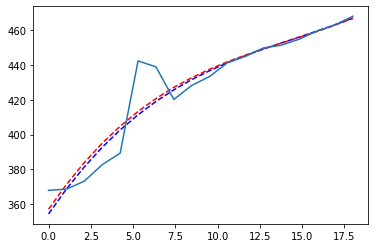

In [71]:
plt.plot(timedata, polynomial(timedata, *popt_x), 'b--')
plt.plot(timedata, polynomial(timedata, *popt_x_init), 'r--')
plt.plot(timedata, xdata)


TypeError: score() missing 2 required positional arguments: 'X' and 'y'

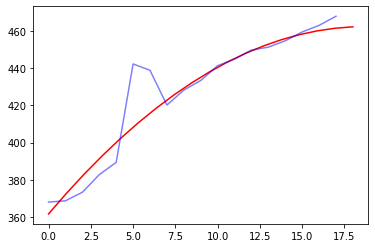

In [33]:
plt.plot(timedata, polynomial(timedata, reg.intercept_ ,reg.coef_[0],reg.coef_[1], 0), color = 'red')
plt.plot(time, front_left['x'], color = 'blue', label = 'front left x', alpha = .5)


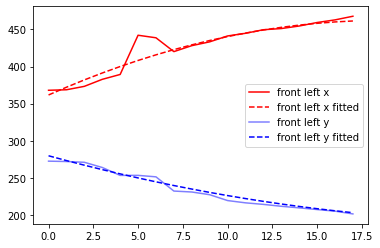

In [115]:
plt.plot(time, front_left['x'], color = 'red', label = 'front left x')
plt.plot(time, polynomial(time, popt_x[0], popt_x[1], popt_x[2]), 'r--', label = 'front left x fitted')
plt.plot(time, front_left['y'], color = 'blue', label = 'front left y', alpha = .5)
plt.plot(time, polynomial(time, popt_y[0], popt_y[1], popt_y[2]), 'b--', label = 'front left y fitted')
plt.legend()

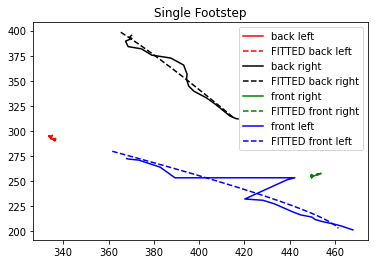

In [127]:
plt.plot(back_left['x'], back_left['y'], color = 'red', label = 'back left')
fitted_x, fitted_y = fit_paw_to_polynomial(back_left)
plt.plot(fitted_x, fitted_y, 'r--', label = 'FITTED back left')
plt.plot(back_right['x'], back_right['y'], color = 'black', label = 'back right')
fitted_x, fitted_y = fit_paw_to_polynomial(back_right)
plt.plot(fitted_x, fitted_y, 'k--', label = 'FITTED back right')
plt.plot(front_right['x'], front_right['y'], color = 'green', label = 'front right')
fitted_x, fitted_y = fit_paw_to_polynomial(front_right)
plt.plot(fitted_x, fitted_y, 'g--', label = 'FITTED front right')
plt.plot(front_left['x'], front_left['y'], color = 'blue', label = 'front left')
plt.plot(polynomial(time, popt_x[0], popt_x[1], popt_x[2]), polynomial(time, popt_y[0], popt_y[1], popt_y[2]), 'b--', label = 'FITTED front left')
plt.title('Single Footstep')
plt.legend()
plt.savefig('fitpoly.png')
plt.show()